In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.gridspec as gridspec
import seaborn as sns
from matplotlib import rcParams, font_manager
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

figuredir = '../../figures'
if not os.path.exists(figuredir):
    os.mkdir(figuredir)

In [117]:
association_var_and_haplotype = pd.read_csv('../../data/tmp/LARGE/LARGE_Haplotype_Associated_Variants_Dprime_R.tsv', sep='\t', index_col=0)
#association_var_and_haplotype['origid'] = association_var_and_haplotype.index
print(association_var_and_haplotype.shape)
#association_var_and_haplotype.index = [('%s:%s[b37]%s,%s' % tuple(x.split(':'))) for x in association_var_and_haplotype.index]
association_var_and_haplotype.head()

(1935, 3)


,Dprime,R,ID
"22:33870673[b37]C,G",0.490297,-0.205172,rs4821151
"22:33871533[b37]C,T",0.611067,-0.081961,rs5754571
"22:33872261[b37]T,C",0.444591,-0.099465,rs5998957
"22:33872468[b37]A,G",0.404796,-0.222312,rs2032475
"22:33872572[b37]T,C",0.438635,-0.096272,rs5998958


In [123]:
ngbase = 'gs://popgen-gwas/data/analysis/results_H3covar_20220309/MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl/results/imputed_gwas/gmmat.fromVCFdosage.SEXPCsH3.MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl.22.Geno_1e-1.results.tsv'
ngres = pd.read_csv(ngbase, sep='\t') 
ngres.index = ngres['SNP']
ind = (ngres['POS'] >= 33600000) & (ngres['POS'] <= 34500000) & (ngres['CHR']==22)
ngres = ngres.loc[ind, :]
ngres['logP'] = ngres['PVAL'].apply(np.log10)*-1
ngres['Direction'] = ngres['SCORE'].apply(np.sign)
ngres['Signed_logP'] = ngres['Direction'] * ngres['logP']
ngres = pd.merge(left=ngres, right=association_var_and_haplotype, left_index=True, right_index=True, how='left')
ngres['Rabs']= ngres['R'].abs()

In [124]:
overlap = list(set(association_var_and_haplotype.index).intersection(set(ngres.index)))
ngres['Dprime'] = np.nan
ngres['R'] = np.nan
ngres.loc[overlap, 'Dprime'] = association_var_and_haplotype.loc[overlap, 'Dprime']
ngres.loc[overlap, 'R'] = association_var_and_haplotype.loc[overlap, 'R']
ngres['Rabs']= ngres['R'].abs()
ngres.sort_values(by='Rabs', ascending=True).head()

,SNP,CHR,POS,REF,ALT,N,MISSRATE,AF,SCORE,VAR,PVAL,logP,Direction,Signed_logP,Dprime,R,ID,Rabs
SNP,,,,,,,,,,,,,,,,,,
"22:34351707[b37]A,C","22:34351707[b37]A,C",22,34351707,A,C,1598,0.025657,0.045601,-3.027657,9.916637,0.336328,0.473236,-1.0,-0.473236,0.000439,-0.000054,rs112557493,0.000054
"22:34355342[b37]A,C","22:34355342[b37]A,C",22,34355342,A,C,1598,0.029412,0.955835,2.826023,9.657421,0.363150,0.439914,1.0,0.439914,0.000208,-0.000094,rs627417,0.000094
"22:34463940[b37]A,C","22:34463940[b37]A,C",22,34463940,A,C,1598,0.001252,0.076441,-2.865695,15.983369,0.473500,0.324680,-1.0,-0.324680,0.005461,-0.000857,rs11912158,0.000857
"22:33936965[b37]A,T","22:33936965[b37]A,T",22,33936965,A,T,1598,0.033166,0.091909,5.569897,17.859425,0.187506,0.726986,1.0,0.726986,0.001631,0.001037,rs59666206,0.001037
"22:34105972[b37]A,C","22:34105972[b37]A,C",22,34105972,A,C,1598,0.084481,0.055024,1.740424,14.851205,0.651542,0.186058,1.0,0.186058,0.002682,0.001528,.,0.001528


In [125]:
ngres['R_signed'] = ngres['R']*ngres['Direction']*-1

In [126]:
ind = ngres['SNP'].apply(lambda x: '34227108' in x)
ngres.loc[ind, :]

,SNP,CHR,POS,REF,ALT,N,MISSRATE,AF,SCORE,VAR,PVAL,logP,Direction,Signed_logP,Dprime,R,ID,Rabs,R_signed
SNP,,,,,,,,,,,,,,,,,,,
"22:34227108[b37]C,T","22:34227108[b37]C,T",22,34227108,C,T,1598,0.057572,0.343958,-4.228181,52.013805,0.557697,0.253602,-1.0,-0.253602,0.875707,0.633005,rs738948,0.633005,0.633005


In [127]:

ind = ngres['SNP'].apply(lambda x: '34220707' in x)
ngres.loc[ind, :]

,SNP,CHR,POS,REF,ALT,N,MISSRATE,AF,SCORE,VAR,PVAL,logP,Direction,Signed_logP,Dprime,R,ID,Rabs,R_signed
SNP,,,,,,,,,,,,,,,,,,,
"22:34220707[b37]A,G","22:34220707[b37]A,G",22,34220707,A,G,1598,0.002503,0.381117,-11.470118,55.634748,0.124102,0.906222,-1.0,-0.906222,0.95568,0.678799,rs16993101,0.678799,0.678799


In [163]:
ngres.loc[ngres['ID'].isin(['rs738948', 'rs16993101', 'rs738949', 'rs58484073', 'rs9607079']), ['SNP', 'ID']]

,SNP,ID
SNP,,
"22:34220707[b37]A,G","22:34220707[b37]A,G",rs16993101
"22:34226582[b37]G,A","22:34226582[b37]G,A",rs9607079
"22:34227108[b37]C,T","22:34227108[b37]C,T",rs738948
"22:34230571[b37]A,G","22:34230571[b37]A,G",rs58484073
"22:34238465[b37]G,C","22:34238465[b37]G,C",rs738949


In [185]:
ngres.loc[ngres['Rabs']>.4, :].sort_values(by='PVAL').head()

,SNP,CHR,POS,REF,ALT,N,MISSRATE,AF,SCORE,VAR,PVAL,logP,Direction,Signed_logP,Dprime,R,ID,Rabs,R_signed
SNP,,,,,,,,,,,,,,,,,,,
"22:34225359[b37]G,A","22:34225359[b37]G,A",22,34225359,G,A,1598,0.010638,0.430740,-18.526273,53.861637,0.011591,1.935861,-1.0,-1.935861,0.918078,0.573836,rs12053767,0.573836,0.573836
"22:34191318[b37]A,C","22:34191318[b37]A,C",22,34191318,A,C,1598,0.003755,0.410176,-16.385962,56.798737,0.029689,1.527405,-1.0,-1.527405,0.953057,0.626060,rs5999104,0.626060,0.626060
"22:34126617[b37]T,C","22:34126617[b37]T,C",22,34126617,T,C,1598,0.054443,0.455659,-15.325188,54.457018,0.037827,1.422198,-1.0,-1.422198,0.781398,0.448767,rs9621759,0.448767,0.448767
"22:34219939[b37]A,G","22:34219939[b37]A,G",22,34219939,A,G,1598,0.000000,0.547247,15.732425,58.186918,0.039165,1.407101,1.0,1.407101,0.972529,-0.550546,rs2267296,0.550546,0.550546
"22:34134109[b37]T,C","22:34134109[b37]T,C",22,34134109,T,C,1598,0.001877,0.341693,-13.840053,51.734845,0.054332,1.264946,-1.0,-1.264946,0.735479,0.530471,rs5999077,0.530471,0.530471


In [182]:
slres.loc['22:34225359[b37]G,A', :]

SNP            22:34225359[b37]G,A
CHR                             22
POS                       34225359
REF                              G
ALT                              A
N                              921
MISSRATE                 0.0228013
AF                        0.374444
SCORE                     -6.84102
VAR                        35.1885
PVAL                      0.248811
logP                       0.60413
Direction                       -1
Signed_logP               -1.93586
Dprime                    0.918078
R                         0.573836
ID                      rs12053767
Rabs                      0.573836
R_signed                  0.573836
Name: 22:34225359[b37]G,A, dtype: object

/opt/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Use the colorbar set_ticks() method instead.


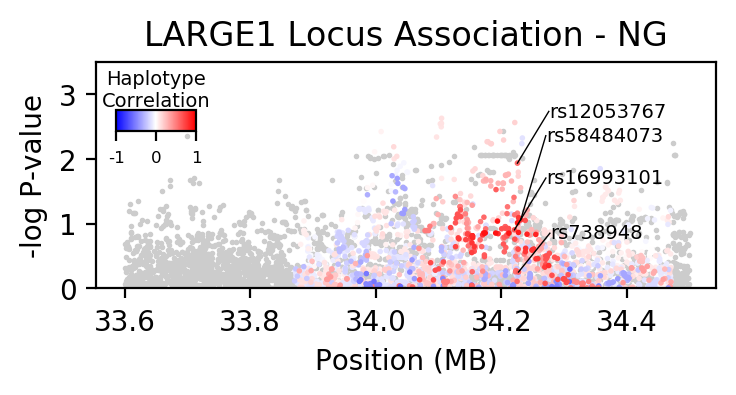

In [212]:
    (fig,ax) = plt.subplots(1,1, figsize=(4,1.5), dpi=200)

    ind = ~ngres.loc[:, 'R'].isnull()
    Z = ngres.copy().sort_values(by='Rabs', ascending=True)
    
    
    ax.scatter(Z.loc[~ind, 'POS'], Z.loc[~ind, 'logP'], s=1, zorder=0,
           color='0.8')
    im = ax.scatter(Z.loc[ind, 'POS'], Z.loc[ind, 'logP'], s=1, zorder=0,
           c=Z.loc[ind, 'R_signed'], cmap='bwr',vmin=-1, vmax=1)

    ax.set_xlabel('Position (MB)')
    ax.set_ylabel('-log P-value')

    ax.set_xticks([3.36e7, 3.38e7, 3.40e7, 3.42e7, 3.44e7])
    ax.set_xticklabels([33.6, 33.8, 34.0, 34.2, 34.4])
    ax.set_ylim([0,3.5])
    ax.set_title('LARGE1 Locus Association - NG')

    xlim = (33500000, 34540000)
    #ax.hlines(y=0, xmin=xlim[0], xmax=xlim[1], linewidth=.5, zorder=1)
    ax.set_xlim(xlim)

    cbar_ax = fig.add_axes([.15,.65, .1, .07])
    cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
    cbar_ax.set_title('Haplotype\nCorrelation', fontsize=7, pad=.2)
    cbar_ax.set_xticks([-1, 0,1])
    cbar_ax.set_xticklabels([-1, 0,1], fontsize=6)
    
    labfs=7

    
    for v in ['22:34227108[b37]C,T']:
        ax.text(x=Z.loc[v, 'POS'] + 50000,
            y=Z.loc[v, 'logP']+.6,
            s=Z.loc[v, 'ID'],
           ha='left', va='center', fontsize=labfs)

        ax.plot([Z.loc[v, 'POS'], Z.loc[v, 'POS'] + 50000],
               [Z.loc[v, 'logP'], Z.loc[v, 'logP']+.6], color='k', linewidth=.5)
        
    for v in ['22:34225359[b37]G,A', '22:34220707[b37]A,G']:
        ax.text(x=Z.loc[v, 'POS'] + 50000,
            y=Z.loc[v, 'logP']+.8,
            s=Z.loc[v, 'ID'],
           ha='left', va='center', fontsize=labfs)

        ax.plot([Z.loc[v, 'POS'], Z.loc[v, 'POS'] + 50000],
               [Z.loc[v, 'logP'], Z.loc[v, 'logP']+.8], color='k', linewidth=.5)

    for v in ['22:34230571[b37]A,G']:
        ax.text(x=Z.loc[v, 'POS'] + 40000,
            y=Z.loc[v, 'logP']+1.3,
            s=Z.loc[v, 'ID'],
           ha='left', va='center', fontsize=labfs)

        ax.plot([Z.loc[v, 'POS'], Z.loc[v, 'POS'] + 40000],
               [Z.loc[v, 'logP'], Z.loc[v, 'logP']+1.3], color='k', linewidth=.5)    

    ax.set_xlim((33.55475160571079e6, 34.541823394289196e6))


    #plt.figtext(.24,.796, 'Haplotype\nCorrelation', fontsize=8, ha='center')
    plt.savefig('../../figures/LARGE_Variant_Association_%s.pdf' % ng_pheno.split('_')[1], bbox_inches='tight')
    plt.savefig('../../figures/LARGE_Variant_Association_%s.png' % ng_pheno.split('_')[1], bbox_inches='tight')

Text(0.24, 0.796, 'Haplotype\nCorrelation')

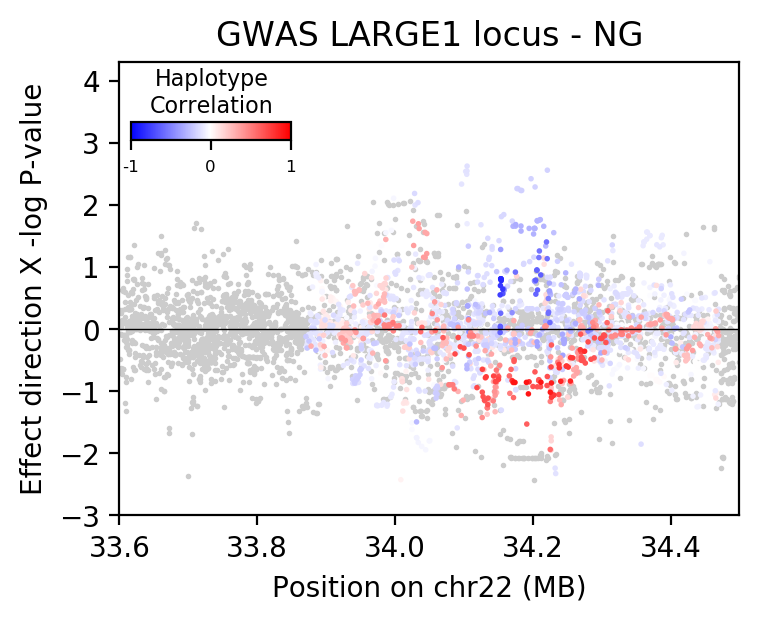

In [146]:
    (fig,ax) = plt.subplots(1,1, figsize=(4,3), dpi=200)

    ind = ~ngres.loc[:, 'R'].isnull()
    Z = ngres.copy().sort_values(by='Rabs', ascending=True)
    
    
    ax.scatter(Z.loc[~ind, 'POS'], Z.loc[~ind, 'Signed_logP'], s=1, zorder=0,
           color='0.8')
    im = ax.scatter(Z.loc[ind, 'POS'], Z.loc[ind, 'Signed_logP'], s=1, zorder=0,
           c=Z.loc[ind, 'R'], cmap='bwr',vmin=-1, vmax=1)

    ax.set_xlabel('Position on chr22 (MB)')
    ax.set_ylabel('Effect direction X -log P-value')

    ax.set_xticks([3.36e7, 3.38e7, 3.40e7, 3.42e7, 3.44e7])
    ax.set_xticklabels([33.6, 33.8, 34.0, 34.2, 34.4])
    ax.set_ylim([-3,4.3])
    ax.set_title('GWAS LARGE1 locus - %s' % ng_pheno.split('_')[1])

    xlim = (33600000, 34500000)
    ax.hlines(y=0, xmin=xlim[0], xmax=xlim[1], linewidth=.5, zorder=1)
    ax.set_xlim(xlim)

    cb_ax = fig.add_axes([.139, .75, 0.2, 0.03])
    cbar = fig.colorbar(im, cax=cb_ax, orientation='horizontal')
    cb_ax.set_xticklabels([-1,0,1], fontsize=6)
    plt.figtext(.24,.796, 'Haplotype\nCorrelation', fontsize=8, ha='center')
    #plt.savefig('../../figures/LARGE_Variant_Association_%s.pdf' % ng_pheno.split('_')[1], bbox_inches='tight')
    #plt.savefig('../../figures/LARGE_Variant_Association_%s.png' % ng_pheno.split('_')[1], bbox_inches='tight')

In [147]:
linkage_thresh = .85
ind = (ngres['R'].abs()>linkage_thresh)
display(ngres.loc[ind, :].sort_values(by='PVAL').head())

,SNP,CHR,POS,REF,ALT,N,MISSRATE,AF,SCORE,VAR,PVAL,logP,Direction,Signed_logP,Dprime,R,ID,Rabs,R_signed
SNP,,,,,,,,,,,,,,,,,,,
"22:34193656[b37]T,G","22:34193656[b37]T,G",22,34193656,T,G,1598,0.008135,0.236909,-11.314630,44.825437,0.091034,1.040795,-1.0,-1.040795,0.921944,0.920313,rs59594190,0.920313,0.920313
"22:34225513[b37]G,A","22:34225513[b37]G,A",22,34225513,G,A,1598,0.011890,0.235909,-10.989106,43.769011,0.096706,1.014545,-1.0,-1.014545,0.906404,0.901082,rs73404896,0.901082,0.901082
"22:34227065[b37]C,T","22:34227065[b37]C,T",22,34227065,C,T,1598,0.061952,0.206137,-9.498434,40.673411,0.136395,0.865201,-1.0,-0.865201,0.921943,0.885872,rs73406608,0.885872,0.885872
"22:34174184[b37]T,C","22:34174184[b37]T,C",22,34174184,T,C,1598,0.012516,0.224018,-9.688534,42.881557,0.139000,0.856986,-1.0,-0.856986,0.954054,0.924667,rs16993014,0.924667,0.924667
"22:34190795[b37]T,C","22:34190795[b37]T,C",22,34190795,T,C,1598,0.013767,0.224302,-9.675783,42.865974,0.139448,0.855586,-1.0,-0.855586,0.952720,0.922242,rs4525791,0.922242,0.922242


In [148]:
linkage_thresh = .85
for p in ng_phenos:
    print(p)
    ind = (ngres['Dprime']>linkage_thresh)
    display(ngres.loc[ind, :].sort_values(by='PVAL').head())

MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl


,SNP,CHR,POS,REF,ALT,N,MISSRATE,AF,SCORE,VAR,PVAL,logP,Direction,Signed_logP,Dprime,R,ID,Rabs,R_signed
SNP,,,,,,,,,,,,,,,,,,,
"22:34221189[b37]T,C","22:34221189[b37]T,C",22,34221189,T,C,1598,0.013767,0.110089,13.783398,21.157185,0.002730,2.563810,1.0,2.563810,0.990961,-0.174824,rs73882307,0.174824,0.174824
"22:34197509[b37]T,A","22:34197509[b37]T,A",22,34197509,T,A,1598,0.020651,0.107029,13.151679,20.586274,0.003748,2.426200,1.0,2.426200,0.990908,-0.174250,rs73885519,0.174250,0.174250
"22:34203359[b37]T,C","22:34203359[b37]T,C",22,34203359,T,C,1598,0.020651,0.106390,12.681860,20.493383,0.005088,2.293450,1.0,2.293450,0.990873,-0.173867,rs73882303,0.173867,0.173867
"22:34178505[b37]C,T","22:34178505[b37]C,T",22,34178505,C,T,1598,0.023154,0.106662,12.550637,20.351200,0.005401,2.267522,1.0,2.267522,0.990801,-0.173098,rs666731,0.173098,0.173098
"22:34177108[b37]C,T","22:34177108[b37]C,T",22,34177108,C,T,1598,0.022528,0.106914,12.551509,20.357929,0.005405,2.267165,1.0,2.267165,0.990819,-0.173291,rs650191,0.173291,0.173291


In [149]:
linkage_thresh = .3
for p in ng_phenos:
    print(p)
    ind = (ngres['R'].abs()>linkage_thresh)
    display(ngres.loc[ind, :].sort_values(by='PVAL').head())

MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl


,SNP,CHR,POS,REF,ALT,N,MISSRATE,AF,SCORE,VAR,PVAL,logP,Direction,Signed_logP,Dprime,R,ID,Rabs,R_signed
SNP,,,,,,,,,,,,,,,,,,,
"22:34225359[b37]G,A","22:34225359[b37]G,A",22,34225359,G,A,1598,0.010638,0.430740,-18.526273,53.861637,0.011591,1.935861,-1.0,-1.935861,0.918078,0.573836,rs12053767,0.573836,0.573836
"22:34025837[b37]A,G","22:34025837[b37]A,G",22,34025837,A,G,1598,0.058198,0.461794,16.996757,51.731011,0.018121,1.741829,1.0,1.741829,0.578889,0.339206,rs5999041,0.339206,-0.339206
"22:34034101[b37]C,T","22:34034101[b37]C,T",22,34034101,C,T,1598,0.000000,0.425532,16.944207,53.008748,0.019951,1.700042,1.0,1.700042,0.580563,0.369203,rs28656978,0.369203,-0.369203
"22:34175254[b37]G,A","22:34175254[b37]G,A",22,34175254,G,A,1598,0.002503,0.309285,15.741240,46.173485,0.020528,1.687654,1.0,1.687654,0.965411,-0.325878,rs427767,0.325878,0.325878
"22:34182877[b37]G,A","22:34182877[b37]G,A",22,34182877,G,A,1598,0.003755,0.270415,15.014966,42.760621,0.021667,1.664208,1.0,1.664208,0.974981,-0.301191,rs9609867,0.301191,0.301191


In [153]:
slbase = 'gs://popgen-gwas/data/analysis/results_H3covar_20220309/MergeEpoch_SL_AgORSeqPos_Vs_PopControl/results/imputed_gwas/gmmat.fromVCFdosage.SEXPCsH3.MergeEpoch_SL_AgORSeqPos_Vs_PopControl.22.Geno_1e-1.results.tsv'
slres = pd.read_csv(slbase, sep='\t') 
slres.index = slres['SNP']
ind = (slres['POS'] >= 33600000) & (slres['POS'] <= 34500000) & (slres['CHR']==22)
slres = slres.loc[ind, :]
slres['logP'] = slres['PVAL'].apply(np.log10)*-1
slres['Direction'] = slres['SCORE'].apply(np.sign)
slres['Signed_logP'] = slres['Direction'] * ngres['logP']
slres = pd.merge(left=slres, right=association_var_and_haplotype, left_index=True, right_index=True, how='left')
slres['Rabs']= slres['R'].abs()

In [154]:
overlap = list(set(association_var_and_haplotype.index).intersection(set(slres.index)))
slres['Dprime'] = np.nan
slres['R'] = np.nan
slres.loc[overlap, 'Dprime'] = association_var_and_haplotype.loc[overlap, 'Dprime']
slres.loc[overlap, 'R'] = association_var_and_haplotype.loc[overlap, 'R']
slres['Rabs']= slres['R'].abs()
slres['R_signed'] = slres['R']*slres['Direction']*-1
slres.sort_values(by='Rabs', ascending=True).head()

,SNP,CHR,POS,REF,ALT,N,MISSRATE,AF,SCORE,VAR,PVAL,logP,Direction,Signed_logP,Dprime,R,ID,Rabs,R_signed
SNP,,,,,,,,,,,,,,,,,,,
"22:34351707[b37]A,C","22:34351707[b37]A,C",22,34351707,A,C,921,0.053203,0.043578,1.215517,6.912375,0.643848,0.191217,1.0,0.473236,0.000439,-0.000054,rs112557493,0.000054,0.000054
"22:34355342[b37]A,C","22:34355342[b37]A,C",22,34355342,A,C,921,0.049946,0.958286,-1.486901,6.527483,0.560579,0.251363,-1.0,-0.439914,0.000208,-0.000094,rs627417,0.000094,-0.000094
"22:34463940[b37]A,C","22:34463940[b37]A,C",22,34463940,A,C,921,0.007600,0.094092,-3.068754,13.533695,0.404186,0.393419,-1.0,-0.324680,0.005461,-0.000857,rs11912158,0.000857,-0.000857
"22:33936965[b37]A,T","22:33936965[b37]A,T",22,33936965,A,T,921,0.047774,0.091220,-0.749040,13.851919,0.840498,0.075463,-1.0,-0.726986,0.001631,0.001037,rs59666206,0.001037,0.001037
"22:34105972[b37]A,C","22:34105972[b37]A,C",22,34105972,A,C,921,0.062975,0.053302,-6.338615,9.445849,0.039169,1.407055,-1.0,-0.186058,0.002682,0.001528,.,0.001528,0.001528


/opt/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Use the colorbar set_ticks() method instead.


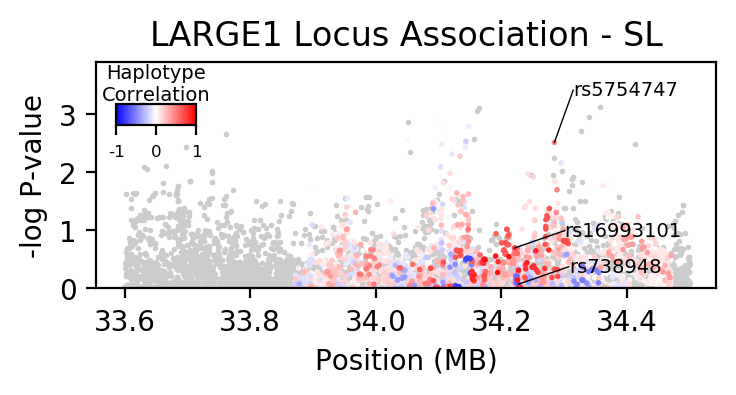

In [213]:
    (fig,ax) = plt.subplots(1,1, figsize=(4,1.5), dpi=200)

    Z = slres.copy().sort_values(by='Rabs', ascending=True)
    Z.index = Z['ID']
    ind = ~Z.loc[:, 'R'].isnull()
    
    ax.scatter(Z.loc[~ind, 'POS'], Z.loc[~ind, 'logP'], s=1, zorder=0,
           color='0.8')
    im = ax.scatter(Z.loc[ind, 'POS'], Z.loc[ind, 'logP'], s=1, zorder=0,
           c=Z.loc[ind, 'R_signed'], cmap='bwr',vmin=-1, vmax=1)

    ax.set_xlabel('Position (MB)')
    ax.set_ylabel('-log P-value')

    ax.set_xticks([3.36e7, 3.38e7, 3.40e7, 3.42e7, 3.44e7])
    ax.set_xticklabels([33.6, 33.8, 34.0, 34.2, 34.4])
    ax.set_ylim([0,3.9])
    ax.set_title('LARGE1 Locus Association - SL')

    xlim = (33500000, 34540000)
    #ax.hlines(y=0, xmin=xlim[0], xmax=xlim[1], linewidth=.5, zorder=1)
    ax.set_xlim(xlim)

    cbar_ax = fig.add_axes([.15,.67, .1, .07])
    cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
    cbar_ax.set_title('Haplotype\nCorrelation', fontsize=7, pad=.2)
    cbar_ax.set_xticks([-1, 0,1])
    cbar_ax.set_xticklabels([-1, 0,1], fontsize=6)

    
    for v in ['rs5754747']:
        ax.text(x=Z.loc[v, 'POS'] + 30000,
            y=Z.loc[v, 'logP']+.9,
            s=Z.loc[v, 'ID'],
            ha='left', va='center', fontsize=labfs)

        ax.plot([Z.loc[v, 'POS'], Z.loc[v, 'POS'] + 30000],
               [Z.loc[v, 'logP'], Z.loc[v, 'logP']+.9], color='k', linewidth=.5)
    
    for v in ['rs738948', 'rs16993101']:
        ax.text(x=Z.loc[v, 'POS'] + 80000,
            y=Z.loc[v, 'logP']+.3,
            s=Z.loc[v, 'ID'],
            ha='left', va='center', fontsize=labfs)

        ax.plot([Z.loc[v, 'POS'], Z.loc[v, 'POS'] + 80000],
               [Z.loc[v, 'logP'], Z.loc[v, 'logP']+.3], color='k', linewidth=.5)
    
    ax.set_xlim((33.55475160571079e6, 34.541823394289196e6))
    #plt.figtext(.24,.796, 'Haplotype\nCorrelation', fontsize=8, ha='center')
    plt.savefig('../../figures/LARGE_Variant_Association_SL.pdf', bbox_inches='tight')
    plt.savefig('../../figures/LARGE_Variant_Association_SL.png', bbox_inches='tight')

In [214]:
slres.loc[slres['Rabs']>.4, :].sort_values(by='PVAL').head()

,SNP,CHR,POS,REF,ALT,N,MISSRATE,AF,SCORE,VAR,PVAL,logP,Direction,Signed_logP,Dprime,R,ID,Rabs,R_signed
SNP,,,,,,,,,,,,,,,,,,,
"22:34284173[b37]A,G","22:34284173[b37]A,G",22,34284173,A,G,921,0.000000,0.590119,18.332500,38.337832,0.003068,2.513075,1.0,0.005266,0.754336,-0.457277,rs5754747,0.457277,0.457277
"22:34288389[b37]A,G","22:34288389[b37]A,G",22,34288389,A,G,921,0.009772,0.375548,-14.249550,37.542373,0.020038,1.698137,-1.0,-0.037486,0.762108,0.488073,rs7285532,0.488073,0.488073
"22:34276269[b37]C,T","22:34276269[b37]C,T",22,34276269,C,T,921,0.036916,0.249718,-11.216428,30.404946,0.041937,1.377406,-1.0,-0.544414,0.795421,0.668541,rs12106531,0.668541,0.668541
"22:34091748[b37]A,C","22:34091748[b37]A,C",22,34091748,A,C,921,0.000000,0.416938,12.395973,37.300251,0.042390,1.372732,1.0,0.032217,0.690311,0.401901,rs2051564,0.401901,-0.401901
"22:34287077[b37]T,A","22:34287077[b37]T,A",22,34287077,T,A,921,0.021716,0.407880,-12.196284,38.459853,0.049225,1.307811,-1.0,-0.108515,0.755288,0.452869,rs16993252,0.452869,0.452869


Text(0.24, 0.796, 'Haplotype\nCorrelation')

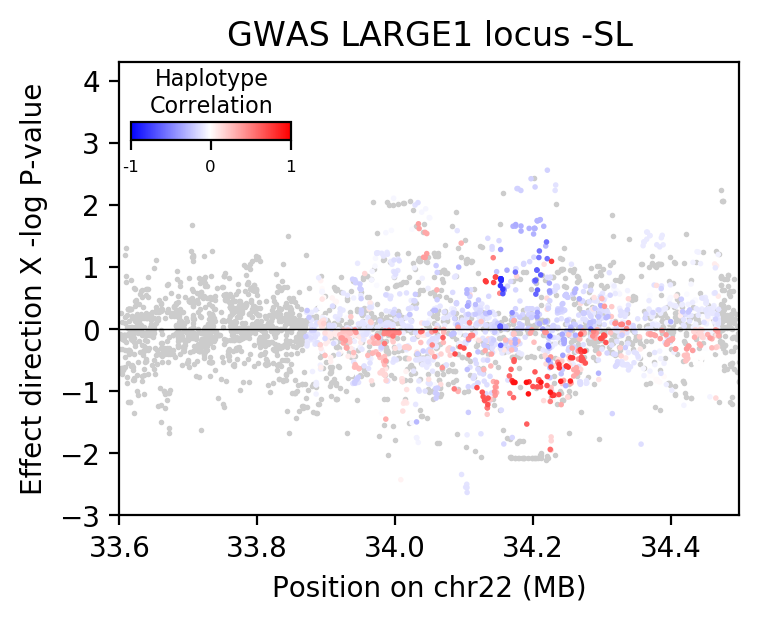

In [101]:
    (fig,ax) = plt.subplots(1,1, figsize=(4,3), dpi=200)

    ind = ~slres.loc[:, 'R'].isnull()
    Z = slres.copy().sort_values(by='Rabs', ascending=True)
    
    
    ax.scatter(Z.loc[~ind, 'POS'], Z.loc[~ind, 'Signed_logP'], s=1, zorder=0,
           color='0.8')
    im = ax.scatter(Z.loc[ind, 'POS'], Z.loc[ind, 'Signed_logP'], s=1, zorder=0,
           c=Z.loc[ind, 'R'], cmap='bwr',vmin=-1, vmax=1)

    ax.set_xlabel('Position on chr22 (MB)')
    ax.set_ylabel('Effect direction X -log P-value')

    ax.set_xticks([3.36e7, 3.38e7, 3.40e7, 3.42e7, 3.44e7])
    ax.set_xticklabels([33.6, 33.8, 34.0, 34.2, 34.4])
    ax.set_ylim([-3,4.3])
    ax.set_title('GWAS LARGE1 locus -SL')

    xlim = (33600000, 34500000)
    ax.hlines(y=0, xmin=xlim[0], xmax=xlim[1], linewidth=.5, zorder=1)
    ax.set_xlim(xlim)

    cb_ax = fig.add_axes([.139, .75, 0.2, 0.03])
    cbar = fig.colorbar(im, cax=cb_ax, orientation='horizontal')
    cb_ax.set_xticklabels([-1,0,1], fontsize=6)
    plt.figtext(.24,.796, 'Haplotype\nCorrelation', fontsize=8, ha='center')
    #plt.savefig('../../figures/LARGE_Variant_Association_%s.pdf' % ng_pheno.split('_')[1], bbox_inches='tight')
    #plt.savefig('../../figures/LARGE_Variant_Association_%s.png' % ng_pheno.split('_')[1], bbox_inches='tight')

In [14]:
linkage_thresh = .85
for p in ng_phenos:
    print(p)
    ind = ((ngres[p]['R']>linkage_thresh) & (ngres[p]['SCORE']<0)) | ((ngres[p]['R']<(-1*linkage_thresh)) & (ngres[p]['SCORE']>0))
    #ind = ((ngres[p]['Dprime']>linkage_thresh) & (ngres[p]['SCORE']<0)) | ((ngres[p]['Dprime']<(-1*linkage_thresh)) & (ngres[p]['SCORE']>0))
    display(ngres[p].loc[ind, :].sort_values(by='PVAL').head())

MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl


,SNP,CHR,POS,REF,ALT,N,MISSRATE,AF,SCORE,VAR,PVAL,logP,Signed_logP,Dprime,R,ID,Rabs
SNP,,,,,,,,,,,,,,,,,
"22:34193656[b37]T,G","22:34193656[b37]T,G",22,34193656,T,G,1598,0.008135,0.236909,-11.338562,44.889343,0.090582,1.042958,-1.042958,0.921944,0.920313,rs59594190,0.920313
"22:34225513[b37]G,A","22:34225513[b37]G,A",22,34225513,G,A,1598,0.011264,0.236076,-10.518830,43.706430,0.111589,0.952377,-0.952377,0.906404,0.901082,rs73404896,0.901082
"22:34254648[b37]G,A","22:34254648[b37]G,A",22,34254648,G,A,1598,0.018773,0.221620,-10.105238,41.088336,0.114916,0.939619,-0.939619,0.879132,0.855707,rs60848515,0.855707
"22:34172398[b37]A,C","22:34172398[b37]A,C",22,34172398,A,C,1598,0.013767,0.223668,-9.569000,43.031770,0.144642,0.839705,-0.839705,0.955252,0.925261,rs59015613,0.925261
"22:34174184[b37]T,C","22:34174184[b37]T,C",22,34174184,T,C,1598,0.012516,0.223701,-9.483464,42.929306,0.147784,0.830374,-0.830374,0.954054,0.924667,rs16993014,0.924667


MergeEpoch_SL_AgORSeqPos_Vs_PopControl


,SNP,CHR,POS,REF,ALT,N,MISSRATE,AF,SCORE,VAR,PVAL,logP,Signed_logP,Dprime,R,ID,Rabs
SNP,,,,,,,,,,,,,,,,,
"22:34254648[b37]G,A","22:34254648[b37]G,A",22,34254648,G,A,921,0.016287,0.167219,-6.015262,22.991191,0.209657,0.678491,-0.678491,0.879132,0.855707,rs60848515,0.855707
"22:34190795[b37]T,C","22:34190795[b37]T,C",22,34190795,T,C,921,0.009772,0.160636,-4.826809,21.081662,0.293142,0.532922,-0.532922,0.952720,0.922242,rs4525791,0.922242
"22:34211867[b37]C,T","22:34211867[b37]C,T",22,34211867,C,T,921,0.010858,0.161361,-4.804280,21.122651,0.295870,0.528900,-0.528900,0.950280,0.920445,rs8135517,0.920445
"22:34172398[b37]A,C","22:34172398[b37]A,C",22,34172398,A,C,921,0.010858,0.158617,-4.480508,20.954087,0.327680,0.484550,-0.484550,0.955252,0.925261,rs59015613,0.925261
"22:34174184[b37]T,C","22:34174184[b37]T,C",22,34174184,T,C,921,0.011944,0.158242,-4.376362,20.963873,0.339162,0.469593,-0.469593,0.954054,0.924667,rs16993014,0.924667
